<a href="https://colab.research.google.com/github/cxbxmxcx/GenReality/blob/master/GEN_2_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports


In [ ]:
import os
import numpy as np
import math
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import FashionMNIST as mnist
from torchvision.utils import save_image, make_grid
import matplotlib.pyplot as plt
from IPython.display import clear_output

Image Helper Functions

In [ ]:
def imshow(img,size=10):
  img = img / 2 + 0.5     
  npimg = img.numpy()
  plt.figure(figsize=(size, size))
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

def to_img(x):    
    x = x.view(x.size(0), 1, 28, 28)
    return x

Hyperparameters

In [ ]:
epochs = 100
batch_size = 64
learning_rate = 1e-3

Load Data

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!





/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


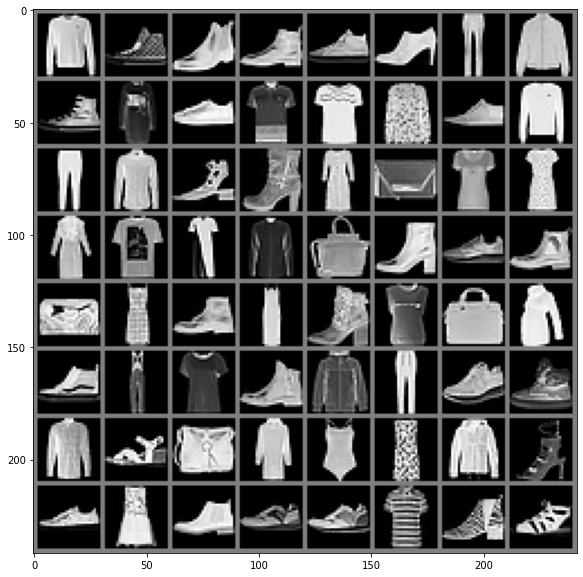

In [ ]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = mnist('./data', download=True, transform=img_transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataiter = iter(dataloader)
images, labels = dataiter.next()
imshow(make_grid(images, nrow=8))

Autoencoder

In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
      nn.Linear(28 * 28, 128),
      nn.ReLU(True),
      nn.Linear(128, 64),
      nn.ReLU(True), nn.Linear(64, 12), nn.ReLU(True), nn.Linear(12, 3))
    self.decoder = nn.Sequential(
      nn.Linear(3, 12),
      nn.ReLU(True),
      nn.Linear(12, 64),
      nn.ReLU(True),
      nn.Linear(64, 128),
      nn.ReLU(True), nn.Linear(128, 28 * 28), nn.Tanh())

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

Model, Loss Function and Optimizer

In [ ]:
model = Autoencoder()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

Training

epoch [99/100], loss:0.0816


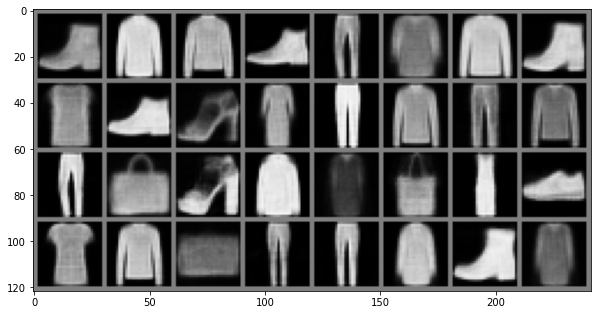

In [ ]:
for epoch in range(epochs):
  for data in dataloader:
    x_img, _ = data
    x_img = x_img.view(x_img.size(0), -1)
    x_img = Variable(x_img)
    # ===================forward=====================
    y_pred = model(x_img)
    loss = loss_fn(y_pred, x_img)
    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  # ===================log========================
  clear_output()
  print(f'epoch [{epoch}/{epochs}], loss:{loss.data:.4f}')
  pic = to_img(y_pred.cpu().data)
  imshow(make_grid(pic))